*__LDA: Income Evaluation__*

In [1]:
%matplotlib inline

In [2]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [3]:
from common import *
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import IncrementalPCA as IPCA
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

In [4]:
np.random.seed(0)

In [5]:
import warnings; warnings.simplefilter('ignore')

In [6]:
# Dataset Phone Price
x_train, x_test, y_train, y_test = read_dataset_income(path_to_file="../Data/dataset1/income_evaluation.csv")
x_train.head()

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country
12132,72,4,11,6,1,4,0,40,39
24787,58,0,11,2,0,2,1,30,39
5923,42,4,11,2,3,4,1,40,39
3464,31,4,9,2,1,4,1,50,39
30739,36,4,9,0,10,4,0,50,39


In [7]:
standard_scaler = MinMaxScaler()
x_train_scaled = standard_scaler.fit_transform(x_train)
x_test_scaled = standard_scaler.fit_transform(x_test)

In [8]:
for i in range(2, 9):
    ipca = IPCA(n_components=i)
    ipca.fit_transform(x_train.values)
    x_new = ipca.fit_transform(x_train.values)
    print(f"Dimension={i}, Sum: {sum(ipca.explained_variance_ratio_)}")

Dimension=2, Sum: 0.7740085292612519
Dimension=3, Sum: 0.9143138651283857
Dimension=4, Sum: 0.9548192110817203
Dimension=5, Sum: 0.9888650349788298
Dimension=6, Sum: 0.9936288151500802
Dimension=7, Sum: 0.9979419362654355
Dimension=8, Sum: 0.9995344303458212


In [16]:
# After chosing the best component
best_component = 9
ipca = IPCA(n_components=best_component)
xn = ipca.fit_transform(x_train)
for i in range(1, best_component):
    x_train[f"ipca-{i}"] = xn[:, i]

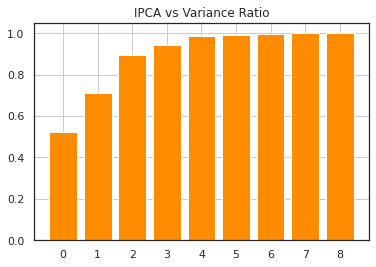

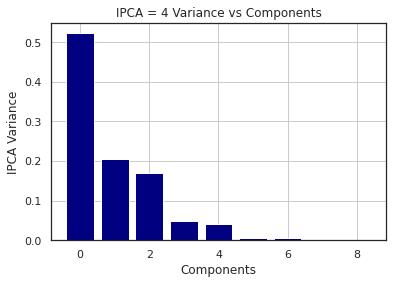

In [23]:
sums_ipca = []
for i in range(1, 10):
    ipca = IPCA(n_components=i)
    ipca.fit_transform(x_train)
    sums_ipca.append(sum(ipca.explained_variance_ratio_))

ipca2 = IPCA(n_components=4)
ipca2.fit_transform(x_train)

plt.figure()
plt.title(f"IPCA vs Variance Ratio")
plt.bar(range(len(sums_ipca)), sums_ipca, color="darkorange")
plt.xticks(range(len(sums_ipca)))
plt.grid()
plt.show()

plt.figure()
plt.title(f"IPCA = 4 Variance vs Components")
plt.bar(range(len(ipca.explained_variance_ratio_)), ipca.explained_variance_ratio_, color='navy')
plt.xlabel("Components")
plt.ylabel("IPCA Variance")
plt.grid()
plt.show()

In [18]:
np.array(y_train['income']).reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [19]:
# Iterate over components and see which one results in least KMeans error
ipca_score = []
for i in range(1, 10):
    ipca = IPCA(n_components=i)
    xtr = ipca.fit_transform(x_train_scaled)  
    kmm = KMeans(n_clusters=2, max_iter=100, n_jobs=-1).fit(xtr)
    ipca_score.append(accuracy_score(kmm.labels_, y_train))
# Same - even here the minimum number of components  = 5

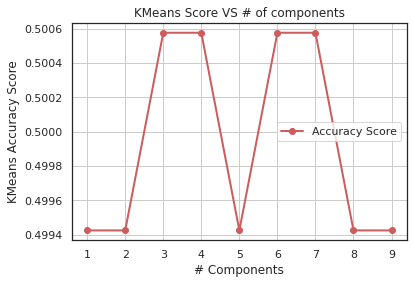

In [20]:
plt.figure()
plt.title("KMeans Score VS # of components")
plt.plot(range(1, 10), ipca_score, 'o-', lw=2, color='indianred', label="Accuracy Score")
plt.xlabel("# Components")
plt.ylabel("KMeans Accuracy Score")
plt.legend()
plt.xticks(range(1, 10))
plt.legend(loc='best')
plt.grid()

In [21]:
x_train

,age,workclass,education,marital-status,occupation,race,sex,hours-per-week,native-country,ipca-1,income,ipca-2,ipca-3,ipca-4,ipca-5,ipca-6,ipca-7,ipca-8
12132,72,4,11,6,1,4,0,40,39,31.393764,0,2.437004,-5.299380,0.002771,3.630492,2.488684,0.378297,-0.690210
24787,58,0,11,2,0,2,1,30,39,15.077281,0,2.419433,-6.449128,0.013329,1.196912,-2.918413,-1.575218,0.411927
5923,42,4,11,2,3,4,1,40,39,3.089016,0,2.357544,-3.552031,0.184304,-0.683228,0.205894,0.268795,0.173694
3464,31,4,9,2,1,4,1,50,39,-4.190295,1,2.265868,-5.653164,-2.328561,-0.866435,0.197316,0.289250,0.558546
30739,36,4,9,0,10,4,0,50,39,0.625075,0,2.182828,3.250942,-1.126144,-2.071448,-1.362581,0.118842,-0.929982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8655,33,4,0,2,7,4,1,40,39,-5.464714,0,1.855411,1.759597,-10.231232,-0.927571,-0.210930,0.284588,0.162668
30381,36,4,11,0,4,4,1,40,39,-2.531029,0,2.340428,-2.612174,0.314617,-2.588379,-0.828041,0.182022,0.118024
27662,51,5,11,0,4,4,1,40,39,11.707762,1,2.376446,-2.398227,0.407453,-2.659970,0.232234,0.171925,0.467673
13696,82,6,11,2,3,4,1,40,5,41.110668,0,-31.515396,-3.626290,1.674663,-0.637265,2.381392,0.693262,-0.052209


<AxesSubplot:xlabel='ipca-1', ylabel='ipca-2'>

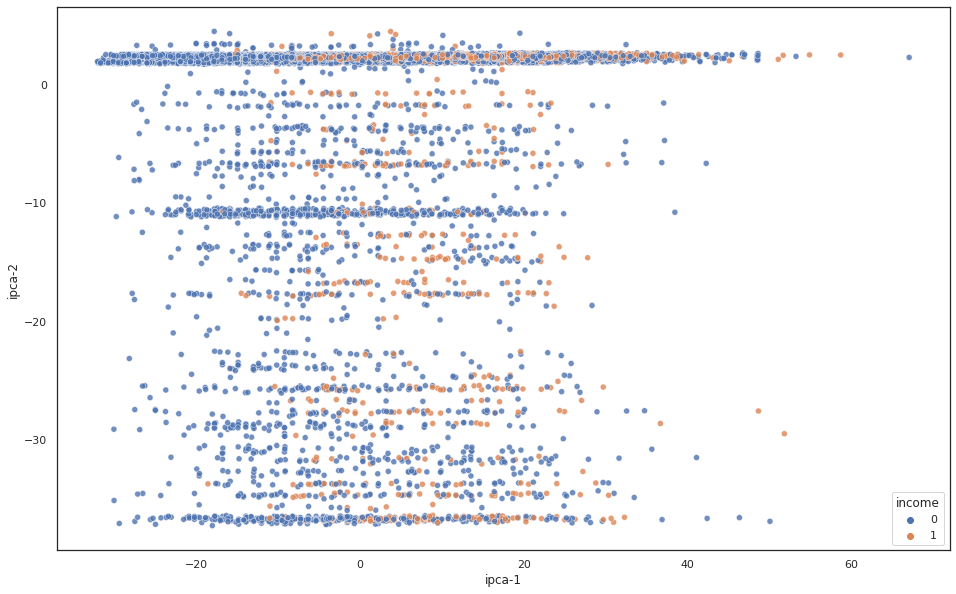

In [36]:
x_train['income'] = y_train['income']
plt.figure(figsize=(16,10))
sns.set_theme(style="white")
sns.scatterplot(
    x="ipca-1", y="ipca-2",
    hue="income",
    data=x_train,
    legend="full",
    alpha=0.8
)

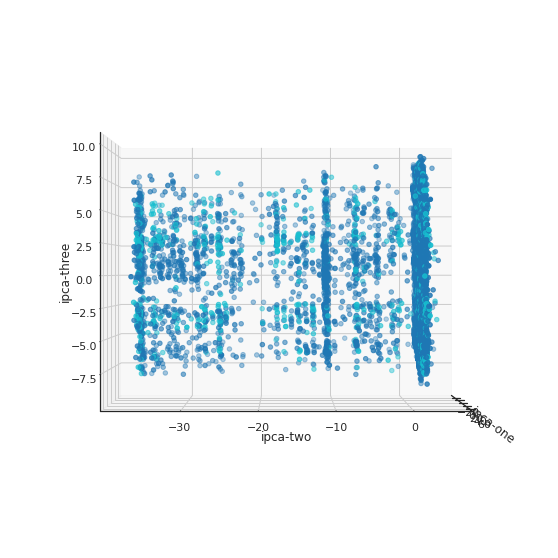

In [32]:
rndperm = np.random.permutation(x_train.shape[0])
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=x_train["ipca-1"], 
    ys=x_train["ipca-2"], 
    zs=x_train["ipca-3"], 
    c=x_train["income"], 
    cmap='tab10'
)
ax.set_xlabel('ipca-one')
ax.set_ylabel('ipca-two')
ax.set_zlabel('ipca-three')
ax.view_init(0, 0)
plt.show()

In [33]:
# KMeans
s = {}
h = {}

for i in range(2, 10):
    print(f"cluster: {i}")
    kmeans = KMeans(n_clusters=i, n_init=50, max_iter=1000, n_jobs=-1).fit(xn)
    label = kmeans.labels_
    s[i] = silhouette_score(xn, label, metric='euclidean')
    h[i] = homogeneity_score(y_train['income'].values, label)
    print(s[i])
    print(h[i])
    print("\n")


cluster: 2
0.27185383884136266
0.00011278865625131865


cluster: 3
0.295719932408954
0.06626569150543131


cluster: 4
0.3165329389606755
0.06590944049105882


cluster: 5
0.3280484133075898
0.0799679321918676


cluster: 6
0.3543915386702103
0.07783246877547294


cluster: 7
0.28576733300861423
0.09444803665247622


cluster: 8
0.2891363126787275
0.10731817423436948


cluster: 9
0.2966732889438088
0.10692095533463196




In [34]:
sdf = pd.DataFrame(list(s.values()), columns=['Silhouette'])
sdf['Homogeneity'] = pd.DataFrame(list(h.values()))

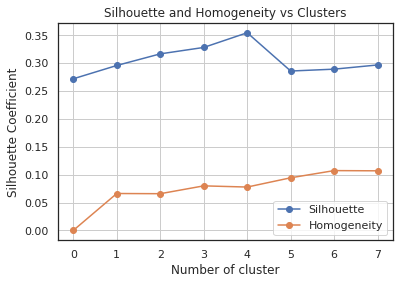

In [35]:
plt.figure()
plt.title("Silhouette and Homogeneity vs Clusters")
plt.plot(sdf, 'o-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient")
plt.grid()
plt.legend(sdf.columns)
plt.show()

In [37]:
# EM

In [ ]:
s_em = {}
h_em = {}
l_em = {}
aic_em = {}
bic_em = {}
for i in range(2, 20, 2):
    clf_gm = GaussianMixture(n_components=i, n_init=50, max_iter=100, random_state=0).fit(xn)
    labels = clf_gm.predict(xn)
    print(labels)
    s_em[i] = silhouette_score(xn, labels, metric="euclidean")
    h_em[i] = homogeneity_score(y_train['income'].values, labels)
    l_em[i] = clf_gm.score(xn)
    aic_em[i] = clf_gm.aic(xn)
    bic_em[i] = clf_gm.bic(xn)

[0 1 0 ... 0 1 0]
[1 3 2 ... 2 0 2]
[4 0 3 ... 4 1 3]
[3 4 2 ... 1 5 2]
[9 4 9 ... 9 3 0]
[0 4 0 ... 0 5 2]
[6 1 0 ... 9 5 6]


In [ ]:
gm_df = pd.DataFrame(list(s_em.values()), columns=['Silhouette'])
gm_df['Homogeneity'] = pd.DataFrame(list(h_em.values()))
gm_df['Likelihood'] = pd.DataFrame(list(l_em.values()))

In [ ]:
plt.figure()
plt.title('EM: Silhouette & Homogeneity Scores vs K')
plt.plot(gm_df[['Silhouette', 'Homogeneity']], 'o-')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(range(gm_df.shape[0]))
plt.grid()
plt.legend(sdf.columns)
plt.show()

In [ ]:
plt.figure()
plt.title('Likelihood vs K')
plt.plot(gm_df[['Likelihood']], 'o-')
plt.xlabel('K')
plt.ylabel('Scores')
plt.xticks(range(gm_df.shape[0]))
plt.grid()
plt.legend(sdf.columns)
plt.show()